# Generates results of the paper

In [1]:
import numpy as np
from util import*
import baselines as bsl
from util import *

###  AUC for different LP algorithms and datasets for Triad based LP algorithms: ['AA', 'CN', 'JC', 'PA']
      


In [2]:
### (DPLP, DPLP-UMNN, DPLP-LIN, Staircase, Lapl., Exp.)
#### Note that DPLP-UMNN was only reported in appendix
Table=read_from_pickle('Table_DPLP_Triad')

score_def="AA"
dataset_name="Facebook"
Table['mean'][score_def][dataset_name]

[0.7882112264633179,
 0.16860181093215942,
 0.21102145314216614,
 0.16266877949237823,
 0.1675252914428711,
 0.1704375147819519]

### AUC for different LP algorithms Deep embedding based LP algorithms: ['GCN','Node2Vec' ,'PRUNE','DeepWalk','LINE','Struc2Vec']


In [3]:
### (DPLP, DPLP-UMNN, DPLP-LIN, Staircase, Lapl., Exp.)
#### Note that DPLP-UMNN was only reported in appendix
Table=read_from_pickle('Table_DPLP_Emb')
score_def="GCN"
dataset_name="Facebook"
Table['mean'][score_def][dataset_name]


[0.15093238651752472,
 0.14854209125041962,
 0.1543658822774887,
 0.15073983371257782,
 0.1445312649011612,
 0.14959187805652618]

### After training both DPLP and DPLP-Lin following the procedure suggested in README.md,  AUC may computed and compared with baselines as follows:
#### (if the entire optimization process is complete, the following cell would throw an exception)


In [ ]:
dataset_name="USAir"
score_def='AA'

qfrac=0.8
test_frac=0.2
dev_frac=0.3
prot_frac=0.3
e_diff= 0.05
dev="cuda:0"



score_def=score_def
expts = bsl.all_dp_algos(dataset_name,
                         qfrac,test_frac, dev_frac, prot_frac,e_diff, 
                         score_def, "PATHS",dev,K=30,ifNumpy=False)



staircase,staircase_std,_ = expts.staircase_noise()
laplace,laplace_std,_ = expts.lap_exp('laplace')
exponential, exponential_std,_ = expts.lap_exp('gumbel')


dplp_lin, lin_std,_ = expts.linear_dplp()
dplp, dplp_std,_ = expts.umnn_dplp()



### (DPLP, DPLP-UMNN, DPLP-LIN, Staircase, Lapl., Exp.)
print(dplp,dplp_lin,staircase,laplace,exponential)


### Generate the figure corresponding to AUC vs  number of protected edges

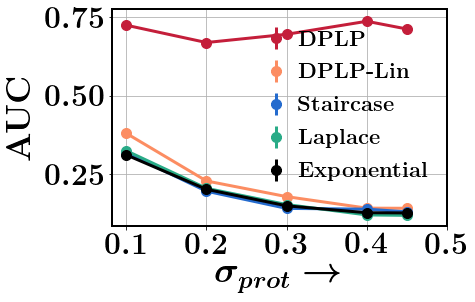

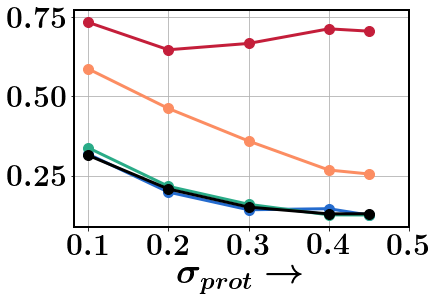

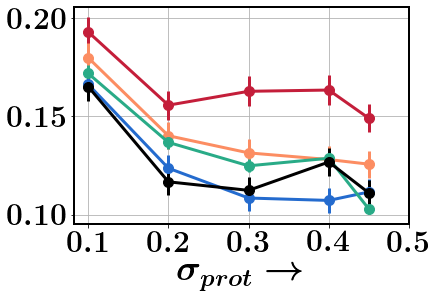

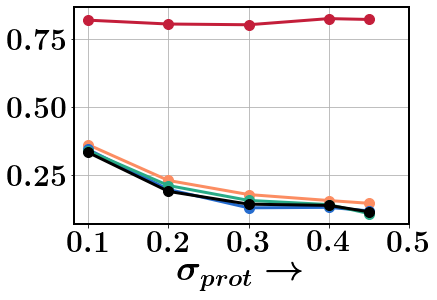

In [4]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
from util import *
from plot_util import *

color_list = [(196/255, 30/255, 58/255),
              (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (36/255, 107/255, 206/255),
             (41/255, 171/255, 135/255),
             (0,0,0),]

latexify()

path = "forpaper/"
dataset='Yeast'
for score_def in ['AA','CN','GCN','Node2Vec']:

    filex='util_prot_'+dataset+'_'+score_def
    util = read_from_pickle(path+filex)
    uu=util['mean']
    vv=util['std']
    fig, ax = plt.subplots()

    label_map=[r'\textbf{DPLP}',r'\textbf{DPLP-Lin}', r'\textbf{Staircase}',
               r'\textbf{Laplace}',r'\textbf{Exponential}']
    for i in range(5):

        ax.errorbar([0.1,0.2,0.3,0.4,0.45],uu[0.05][:,i], yerr = vv[0.05][:,i]/(0.8*1805)**0.5,label=label_map[i], linewidth=3,marker='o',
                    markersize=10, color=color_list[i])
    if score_def=='AA':
        ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4)
        plt.ylabel(r'$\textbf{AUC}$', fontsize=35, labelpad=7)
    plt.xlabel(r'$\sigma_{prot} \rightarrow$', fontsize=35)
    
    plt.xticks([0.1,0.2,0.3,0.4,0.5])
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
 
    plt.grid()


### Generate the figure corresponding to AUC vs  e

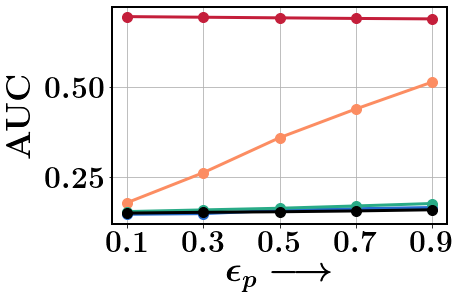

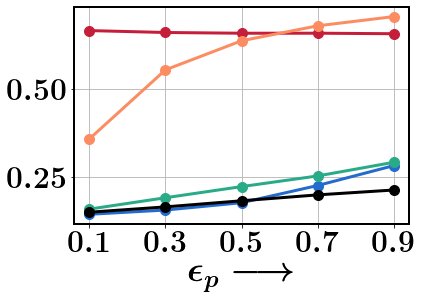

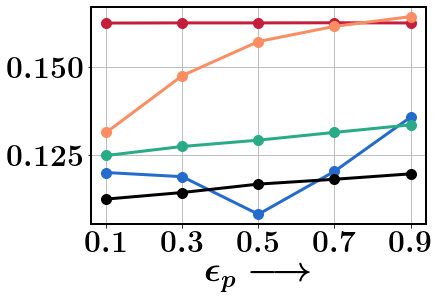

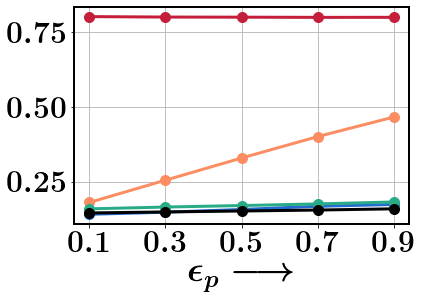

In [5]:
latexify()
path = "forpaper/"
dataset='Yeast'
for score_def in ['AA','CN','GCN','Node2Vec']:

    filex='util_e_forpaper_'+dataset+'_'+score_def
    util = read_from_pickle(path+filex)
    uu=util['mean']
    fig, ax = plt.subplots()
    label_map=['DPLP','DPLP-Linear', 'Staircase', 'Laplace','Exp']
    for i in range(5):

        ax.plot([0.1,0.3,0.5,0.7,0.9],uu[0.3][0:,i], label=label_map[i], linewidth=3,marker='o',
                    markersize=10, color=color_list[i])

    if score_def=='AA':
        plt.ylabel(r'$\textbf{AUC}$', fontsize=35, labelpad=7)
    plt.xlabel(r'${\epsilon_p}\longrightarrow$', fontsize=35)
    plt.xticks([0.1,0.3,0.5,0.7,0.9])

    plt.box(on=True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    plt.grid()
